# **Practica 1 - Paralelismo**

[Victor Sanchez](https://github.com/VicoSan07) <br>

El **paralelismo** es un proceso de descomposición de problemas, donde a cada componente se le asigna un número determinado de procesadores que permitan su ejecución de manera independiente, para finalmente recombinar los resultados obtenidos para su respectivo análisis.

Este proceso ha sido ampliamente utilizado en problemas de Big Data, donde el uso de la memoria juega un papel importante. Sin embargo, existen diversas formas de gestionar el uso de la memoria, siendo una de ellas, las denominadas variables *lazy*, las cuales son variables que se inicializan solamente cuando se les llama por primera vez, es decir, no producen almacenamiento de memoria hasta el momento de su llamado, lo que permite ahorrar recursos computacionalmente. El retraso o *delay* por su nombre en ingles permite gestionar de una mejor manera los recursos computacionales ante la gran cantidad de variables y datos subyacentes a problemas grandes, ya que sin el mismo se puede producir una sobresaturación de los recursos.

### La administradora de Fondos de Inversión

A continuación se presenta un ejemplo práctico de paralelización con varios cuellos de botella, en el cual una administradora de fondos de inversión desea calcular el ingreso total anual que obtuvo de la gestión de los saldos de sus clientes, teniendo como antecedente que cobran una comisión por apertura de 100 pesos mexicanos por cada cliente más un posible cobro por objetivos en dado caso que el rendimiento anual del portafolio total de la compañía sea superior al 10%, de lo contrario el cobro es nulo.

Las funciones que a continuación se presentan contienen operaciones algebráicas básicas: cobro por apertura y comisión; y cálculo de rendimientos y saldos.

In [91]:
import numpy as np
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time
import random

#Apertura Inversion funcion: Resta 100 MXN al saldo de cada cliente
def ap(i):
  return i - 100

#Saldo post rendimiento funcion: Calcula el saldo del cliente post rendimiento
def salrend(j):
  return j*(1+random.randint(6,15)/100)

#Rendimiento funcion: Calcula el rendimiento de una posicion
def rend(z1,z0):
  return (z1/z0-1)

# Comision funcion:
def cobro(z,rd):
  return z*0.01 if rd>0.10 else 0

En el grafo de paralelización podemos observar al menos cuatro cuellos de botella derivado del proceso necesario para el cálculo del ingreso anual de la administradora, el cuál se describe a continuación

* Descuento de cobro por apertura
* Cálculo de saldos post rendimiento: en función del paso anterior
* Rendimiento del portafolio de la compañía: en función de los pasos anteriores
* Ingreso total de la compañía: en función de los anteriores dos pasos

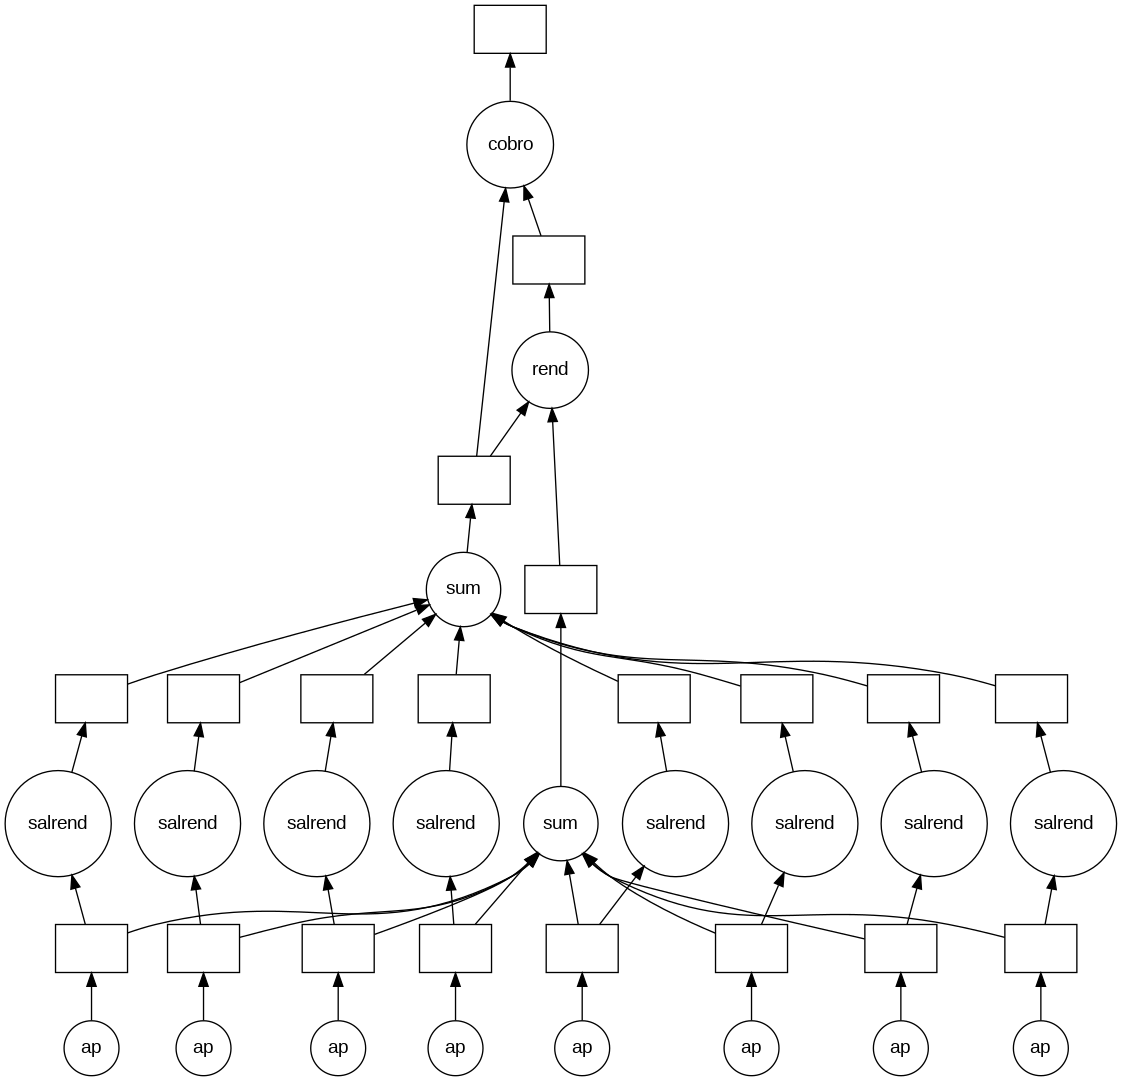

In [94]:
#Dummy dataframe
saldos = [3180, 8350, 7800, 1850, 5550, 7820, 6430, 10000]

inversion = [delayed(ap)(i) for i in saldos]
crecimiento = [delayed(salrend)(j) for j in inversion]
valorinicial = delayed(sum)(inversion)
valorfinal = delayed(sum)(crecimiento)
rendimiento = delayed(rend)(valorfinal,valorinicial)
resultado = delayed(cobro)(valorfinal,rendimiento)
resultado.visualize()

#proporciones = [delayed(prop)(k, valorfinal) for k in saldos]
#total2 = delayed(sum)(data2)
#total2.visualize()

In [96]:
resultado.compute()

564.032

In [100]:
%%time
resultado

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


Delayed('cobro-93cf7897-8122-4cdc-8d2c-f25ecb553882')

A tráves del anterior ejemplo se pone en práctica el proceso de paralelización bajo un primer acercamiento, en este caso el tiempo de ejecución fue bajo teniendo en cuenta el bajo nivel de complejidad de las operaciones. Espero traer ejemplos más sofisticados conforme vaya practicando 